In [148]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [6]:
df1 = pd.read_csv('C://Users//Abhishek//Vivil//Synthetic Data/Trial 1-GIST/syn_a_aev.csv')

In [8]:
df1.head()

,MASK_ID,SOC_TXT,AEDCVIS,AEVSMR1C,AEVGRD1C,AEHOSP,ANYAE,VIS1N,PT_TXT
0,1,Gastrointestinal disorders,0.0,3.0,1.0,0.0,1.0,301.0,Diarrhoea
1,1,Psychiatric disorders,0.0,3.0,1.0,0.0,1.0,301.0,Anxiety
2,1,Gastrointestinal disorders,0.0,3.0,1.0,0.0,1.0,301.0,Nausea
3,1,General disorders and administration site cond...,0.0,3.0,1.0,0.0,1.0,301.0,Fatigue
4,1,General disorders and administration site cond...,0.0,3.0,1.0,0.0,1.0,301.0,Fatigue


In [9]:
df1.describe()

,MASK_ID,AEDCVIS,AEVSMR1C,AEVGRD1C,AEHOSP,ANYAE,VIS1N
count,15075.000000,14911.000000,14846.000000,14830.000000,7277.000000,14924.000000,14919.000000
mean,379.985937,0.113272,2.603058,1.192987,0.024735,0.999799,851.985254
std,217.221060,0.316936,1.018383,0.466395,0.155328,0.014177,366.505808
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000
25%,202.000000,0.000000,2.000000,1.000000,0.000000,1.000000,501.000000
50%,369.000000,0.000000,3.000000,1.000000,0.000000,1.000000,801.000000
75%,570.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1201.000000
max,773.000000,1.000000,6.000000,5.000000,1.000000,1.000000,2401.000000


**Removing NULL values**

In [11]:
# step 2: remove useless data
# count the number of missing elements (NaN) in each column
counter_nan = df1.isnull().sum()

In [12]:
counter_nan

MASK_ID        0
SOC_TXT       75
AEDCVIS      164
AEVSMR1C     229
AEVGRD1C     245
AEHOSP      7798
ANYAE        151
VIS1N        156
PT_TXT        75
dtype: int64

In [14]:
df1 =df1.fillna(df1.median())

In [17]:
df1 = df1.dropna()

In [35]:
diseases= df1.PT_TXT.unique()
consulting = df1.SOC_TXT.unique()

In [34]:
print(len(diseases))
print(diseases)

571
['Diarrhoea' 'Anxiety' 'Nausea' 'Fatigue' 'Constipation' 'Tinnitus'
 'Cystitis' 'Atrial fibrillation' 'Oedema peripheral'
 'Aspartate aminotransferase increased' 'Blood bilirubin increased' 'Rash'
 'Alanine aminotransferase increased' 'Hyperglycaemia' 'Arthritis'
 'Exfoliative rash' 'Dizziness' 'Muscle spasms' 'Vomiting' 'Insomnia'
 'Myalgia' 'Haemoglobin decreased' 'Platelet count decreased'
 'Blood creatinine increased' 'Blood alkaline phosphatase increased'
 'White blood cell count decreased' 'Pruritus' 'Dysgeusia' 'Chills'
 'Anorexia' 'Periorbital oedema' 'Hyperkalaemia'
 'Upper respiratory tract infection' 'Flatulence'
 'Neutrophil count decreased' 'Arthralgia' 'Lymphopenia'
 'Hyperbilirubinaemia' 'Abdominal pain' 'Headache' 'Rhinitis allergic'
 'Rectal haemorrhage' 'Angina pectoris' 'Hypoaesthesia' 'Anaemia'
 'Dyspepsia' 'Blood lactate dehydrogenase increased'
 'Hypercholesterolaemia' 'Weight decreased' 'Dry mouth'
 'Red blood cell count decreased' 'Inguinal hernia' 'Vision b

**Top 10 Medical Problems**

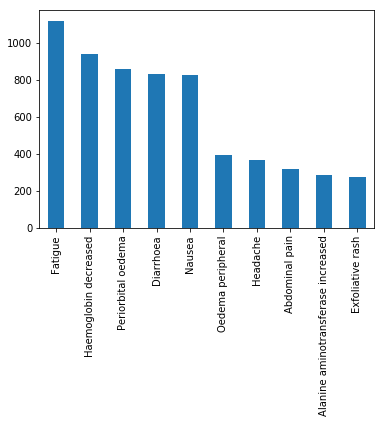

In [45]:
df1['PT_TXT'].value_counts().head(10).plot.bar()

In [38]:
print(len(consulting))
print(consulting)

23
['Gastrointestinal disorders' 'Psychiatric disorders'
 'General disorders and administration site conditions'
 'Ear and labyrinth disorders' 'Infections and infestations'
 'Cardiac disorders' 'Investigations'
 'Skin and subcutaneous tissue disorders'
 'Metabolism and nutrition disorders'
 'Musculoskeletal and connective tissue disorders'
 'Nervous system disorders' 'Blood and lymphatic system disorders'
 'Hepatobiliary disorders'
 'Respiratory, thoracic and mediastinal disorders' 'Eye disorders'
 'Immune system disorders'
 'Injury, poisoning and procedural complications'
 'Renal and urinary disorders' 'Reproductive system and breast disorders'
 'Vascular disorders'
 'Neoplasms benign, malignant and unspecified (incl cysts and polyps)'
 'Endocrine disorders' 'Surgical and medical procedures']


**Top medical problem catagories**

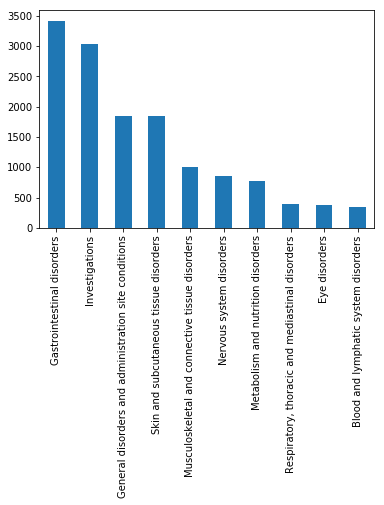

In [46]:
df1['SOC_TXT'].value_counts().head(10).plot.bar()

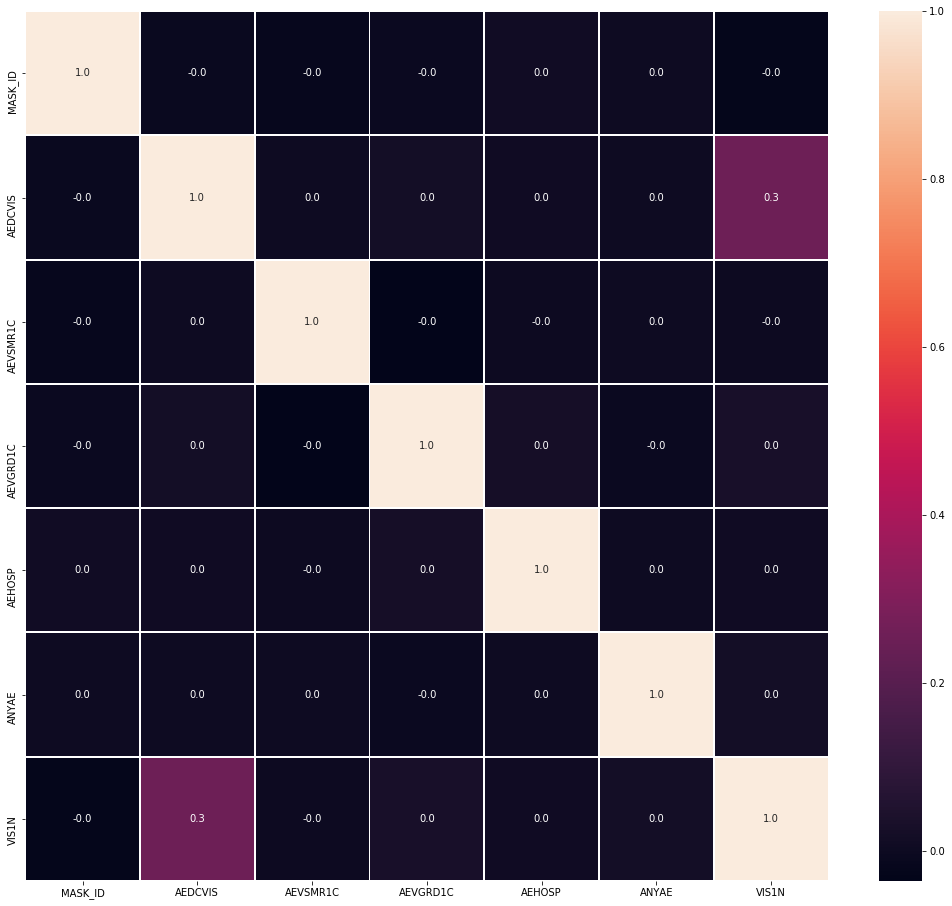

In [24]:
f,ax = plt.subplots(figsize=(18, 16))
sns.heatmap(df1.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

**Patient Hospitalized vs Not Hospitalized**

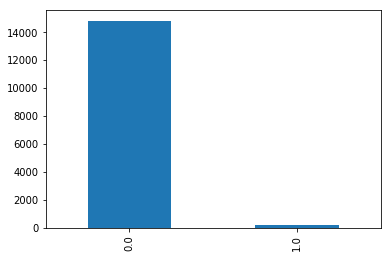

In [47]:
df1['AEHOSP'].value_counts().head(10).plot.bar()

In [92]:
df_top_freq = df1.groupby(['PT_TXT'])['PT_TXT'].agg(
    {"code_count": len}).sort_values(
    "code_count", ascending=False).head(10).reset_index()

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [83]:
tst = df1.groupby('PT_TXT')

In [97]:
df1['PT_TXT'].value_counts().head(10)

Fatigue                               1119
Haemoglobin decreased                  941
Periorbital oedema                     857
Diarrhoea                              832
Nausea                                 825
Oedema peripheral                      396
Headache                               369
Abdominal pain                         321
Alanine aminotransferase increased     284
Exfoliative rash                       273
Name: PT_TXT, dtype: int64

**DataFrame consisting of only top 10 most occuring Diseases**

In [126]:
df1.set_index('PT_TXT', inplace=True)

In [130]:
final_dataset = df1.loc[df1.index.isin(['Fatigue','Nausea','Haemoglobin decreased','Periorbital oedema','Diarrhoea','Oedema peripheral','Headache','Abdominal pain','Alanine aminotransferase increased','Alanine aminotransferase increased','Exfoliative rash'])]

In [131]:
final_dataset

,MASK_ID,SOC_TXT,AEDCVIS,AEVSMR1C,AEVGRD1C,AEHOSP,ANYAE,VIS1N
PT_TXT,,,,,,,,
Diarrhoea,1,Gastrointestinal disorders,0.0,3.0,1.0,0.0,1.0,301.0
Nausea,1,Gastrointestinal disorders,0.0,3.0,1.0,0.0,1.0,301.0
Fatigue,1,General disorders and administration site cond...,0.0,3.0,1.0,0.0,1.0,301.0
Fatigue,1,General disorders and administration site cond...,0.0,3.0,1.0,0.0,1.0,301.0
Oedema peripheral,1,General disorders and administration site cond...,0.0,2.0,1.0,0.0,1.0,402.0
Diarrhoea,1,Gastrointestinal disorders,0.0,1.0,2.0,0.0,1.0,501.0
Alanine aminotransferase increased,1,Investigations,0.0,3.0,1.0,0.0,1.0,501.0
Exfoliative rash,2,Skin and subcutaneous tissue disorders,1.0,1.0,2.0,0.0,1.0,1001.0
Haemoglobin decreased,2,Investigations,0.0,1.0,1.0,1.0,1.0,501.0


In [155]:
final_dataset =final_dataset.reset_index()

In [156]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
final_dataset['SOC_TXT']= label_encoder.fit_transform(final_dataset['SOC_TXT']) 
  
final_dataset['SOC_TXT'].unique() 

array([0, 1, 2, 4, 3], dtype=int64)

In [158]:
final_dataset.head()

,PT_TXT,MASK_ID,SOC_TXT,AEDCVIS,AEVSMR1C,AEVGRD1C,AEHOSP,ANYAE,VIS1N
0,Diarrhoea,1,0,0.0,3.0,1.0,0.0,1.0,301.0
1,Nausea,1,0,0.0,3.0,1.0,0.0,1.0,301.0
2,Fatigue,1,1,0.0,3.0,1.0,0.0,1.0,301.0
3,Fatigue,1,1,0.0,3.0,1.0,0.0,1.0,301.0
4,Oedema peripheral,1,1,0.0,2.0,1.0,0.0,1.0,402.0


In [159]:
# step 3: get features (x) and scale the features
# get x and convert it to numpy array
x = final_dataset.iloc[:,1:].values
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)

In [150]:
x_std.shape

(6216, 8)

In [142]:
y = final_dataset.iloc[:,0].values
y.shape

(6217,)

In [162]:
# step 4: get class labels y and then encode it into number 
# get class label data
y = final_dataset.iloc[:,0].values
# encode the class label
class_labels = np.unique(y)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [163]:
# step 5: split the data into training set and test set
test_percentage = 0.1
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = test_percentage, random_state = 0)

In [164]:
# t-distributed Stochastic Neighbor Embedding (t-SNE) visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0) # n_components is the number of dimension that we want
x_test_2d = tsne.fit_transform(x_test)

**T-SNE**

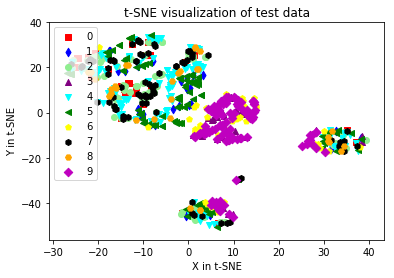

In [172]:
# scatter plot the sample points among 5 classes
markers=('s', 'd', 'o', '^', 'v','<','p','h','H','D')
color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple', 4:'cyan', 5:'green',6:'yellow', 7:'black',8:'orange', 9:'m'}
plt.figure()
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()